In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

print(torch.__version__)
torch.cuda.is_available()

2.8.0+cu126


True

In [3]:
trans = transforms.Compose([
    transforms.RandomCrop([128, 128]),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()])

In [13]:
training_data = datasets.Imagenette(
    root="data",
    split="train",
    size="160px",
    download=True,
    transform=trans,
)

# Download test data from open datasets.
test_data = datasets.Imagenette(
    root="data",
    split="val",
    size="160px",
    download=True,
    transform=trans,
)

In [5]:
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])
#
# training_data = datasets.ImageFolder(
#     "data/imagenette2-160/train",
#     transforms.Compose([
#         transforms.Resize(128),
#         transforms.CenterCrop(128),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         normalize,
#         transforms.Grayscale(num_output_channels=1),
#     ])
# )
#
# test_data = datasets.ImageFolder(
#     "data/imagenette2-160/val",
#     transforms.Compose([
#         transforms.Resize(128),
#         transforms.CenterCrop(128),
#         transforms.ToTensor(),
#         normalize,
#         transforms.Grayscale(num_output_channels=1),
#     ])
# )

In [14]:
training_data

Dataset Imagenette
    Number of datapoints: 9469
    Root location: data
    StandardTransform
Transform: Compose(
               RandomCrop(size=(128, 128), padding=None)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [15]:
training_data.classes

[('tench', 'Tinca tinca'),
 ('English springer', 'English springer spaniel'),
 ('cassette player',),
 ('chain saw', 'chainsaw'),
 ('church', 'church building'),
 ('French horn', 'horn'),
 ('garbage truck', 'dustcart'),
 ('gas pump', 'gasoline pump', 'petrol pump', 'island dispenser'),
 ('golf ball',),
 ('parachute', 'chute')]

In [20]:
first_image, first_label = training_data[10]

In [21]:
first_image.shape, first_label

(torch.Size([1, 128, 128]), 0)

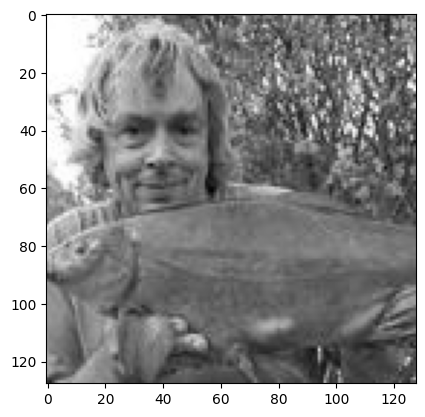

In [22]:
import matplotlib.pyplot as plt
import numpy as np

"""
Deep learning libraries like PyTorch and TensorFlow typically use channels-first format (C, H, W) for image tensors, while matplotlib expects channels-last format (H, W, C). The transpose operation rearranges the dimensions to make the tensor compatible with matplotlib's expectations.
"""

plt.imshow(np.transpose(first_image, (1, 2, 0)), cmap="gray")

In [77]:
# from collections import Counter
#
# counter_w = Counter()
# counter_h = Counter()
#
# for i, data in enumerate(training_data):
#     counter_h.update([data[0].shape[1]])
#     counter_w.update([data[0].shape[2]])
#
# print(sorted(counter_w.items(), key=lambda x: x[1], reverse=True))
# print(sorted(counter_h.items(), key=lambda x: x[1], reverse=True))

[(128, 9469)]
[(128, 9469)]


In [128]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(128*128, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits



In [129]:
model = NeuralNetwork()
print(model)
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16384, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [130]:
batch_size = 64

# Create data loaders.
train_dl = DataLoader(training_data, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(test_data, batch_size=batch_size)

In [96]:
for b in train_dl:
    print(b[0].shape, b[1])
    break

torch.Size([16, 1, 128, 128]) tensor([9, 5, 3, 4, 1, 9, 0, 6, 6, 2, 1, 0, 4, 6, 8, 6])


In [97]:
from training_utils import train, plot_hist, evaluate

In [131]:
torch.manual_seed(17)
num_epochs = 10
hist = train(model, num_epochs, train_dl, val_dl)

Epoch 1: train_acc: 0.2686 val_acc: 0.2764 train_loss: 2.2367 val_loss: 2.0570
Epoch 2: train_acc: 0.3203 val_acc: 0.2907 train_loss: 1.9675 val_loss: 2.0339
Epoch 3: train_acc: 0.3408 val_acc: 0.3045 train_loss: 1.8994 val_loss: 2.0207
Epoch 4: train_acc: 0.3647 val_acc: 0.3101 train_loss: 1.8482 val_loss: 1.9948
Epoch 5: train_acc: 0.3726 val_acc: 0.3169 train_loss: 1.8095 val_loss: 1.9621
Epoch 6: train_acc: 0.3991 val_acc: 0.3129 train_loss: 1.7445 val_loss: 2.0636
Epoch 7: train_acc: 0.4131 val_acc: 0.3195 train_loss: 1.7030 val_loss: 2.0885
Epoch 8: train_acc: 0.4271 val_acc: 0.3149 train_loss: 1.6622 val_loss: 2.0569
Epoch 9: train_acc: 0.4520 val_acc: 0.3182 train_loss: 1.6180 val_loss: 2.0817
Epoch 10: train_acc: 0.4607 val_acc: 0.3118 train_loss: 1.5660 val_loss: 2.1204


It is challenging to train a model for bigger images with a vanilla neural network.!!!